# DATASET 19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
s=pd.read_csv(r"C:\Users\user\Downloads\C10_air\stations.csv")
s

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604
5,28079018,Farolillo,Calle Farolillo - C/Ervigio,-3.731853,40.394781,630
6,28079024,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642
7,28079027,Barajas Pueblo,"C/. Júpiter, 21 (Barajas)",-3.580031,40.476928,621
8,28079035,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,-3.703172,40.419208,659
9,28079036,Moratalaz,Avd. Moratalaz esq. Camino de los Vinateros,-3.645306,40.407947,685


In [3]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24 non-null     int64  
 1   name       24 non-null     object 
 2   address    24 non-null     object 
 3   lon        24 non-null     float64
 4   lat        24 non-null     float64
 5   elevation  24 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ KB


In [4]:
#linear
x=s[['id', 'lon', 'lat']]
y=s['elevation']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=4)

In [35]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
print(lr.intercept_)


8325342.906142443


In [37]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
id,-0.296792
lon,94.327535
lat,229.716487


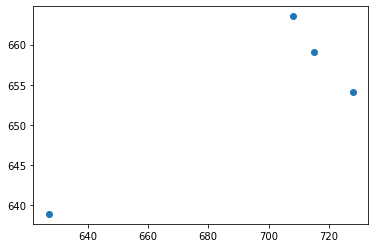

In [38]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [39]:
print(lr.score(x_test,y_test))

-0.7035069294507876


In [40]:
lr.score(x_train,y_train)

0.10100705148757017

In [41]:
#lasso
from sklearn.linear_model import Ridge,Lasso

In [42]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [43]:
la.score(x_test,y_test)

-1.1997135854013634

In [44]:
#ridge
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [45]:
rr.score(x_test,y_test)

-1.2058826337180508

In [46]:
#elasticnet
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [47]:
print(p.coef_)

[-0.03363242  0.          0.        ]


In [48]:
print(p.intercept_)

945017.1143433402


In [49]:
print(p.predict(x_test))

[651.95930839 650.64764392 650.51311423 650.3113197 ]


In [50]:
print(p.score(x_test,y_test))

-1.2068839368564412


In [51]:
#logistic
from sklearn.preprocessing import StandardScaler

In [52]:
b=StandardScaler().fit_transform(x)

In [53]:
p=LogisticRegression(max_iter=10000)
p.fit(b,y)

LogisticRegression(max_iter=10000)

In [54]:
t=[[12,22,32]]

In [55]:
e=p.predict(t)
print(e)

[618]


In [56]:
p.classes_

array([599, 604, 615, 618, 621, 627, 630, 635, 642, 659, 660, 662, 670,
       674, 676, 677, 685, 693, 698, 700, 708, 715, 728], dtype=int64)

In [57]:
print(p.score(x_test,y_test))

0.0


In [58]:
p.predict_proba(t)[0][0]

1.851361438573849e-22

In [59]:
p.predict_proba(t)[0][1]

3.407926151634601e-40

In [60]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
parameters={'max_depth':[1,57,23],
  'min_samples_leaf':[5,34,67],
           'n_estimators':[2,46,56]}

In [62]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 57, 23],
                         'min_samples_leaf': [5, 34, 67],
                         'n_estimators': [2, 46, 56]},
             scoring='accuracy')

In [63]:
grid_search.best_score_

0.05

In [64]:
rfc_best=grid_search.best_estimator_

[Text(1395.0, 1997.73, 'X[2] <= 40.453\ngini = 0.895\nsamples = 13\nvalue = [0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 4, 0\n0, 0, 2, 0, 1]'),
 Text(697.5, 665.9099999999999, 'gini = 0.843\nsamples = 8\nvalue = [0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0\n0, 0, 2, 0, 0]'),
 Text(2092.5, 665.9099999999999, 'gini = 0.716\nsamples = 5\nvalue = [0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 4, 0\n0, 0, 0, 0, 1]')]

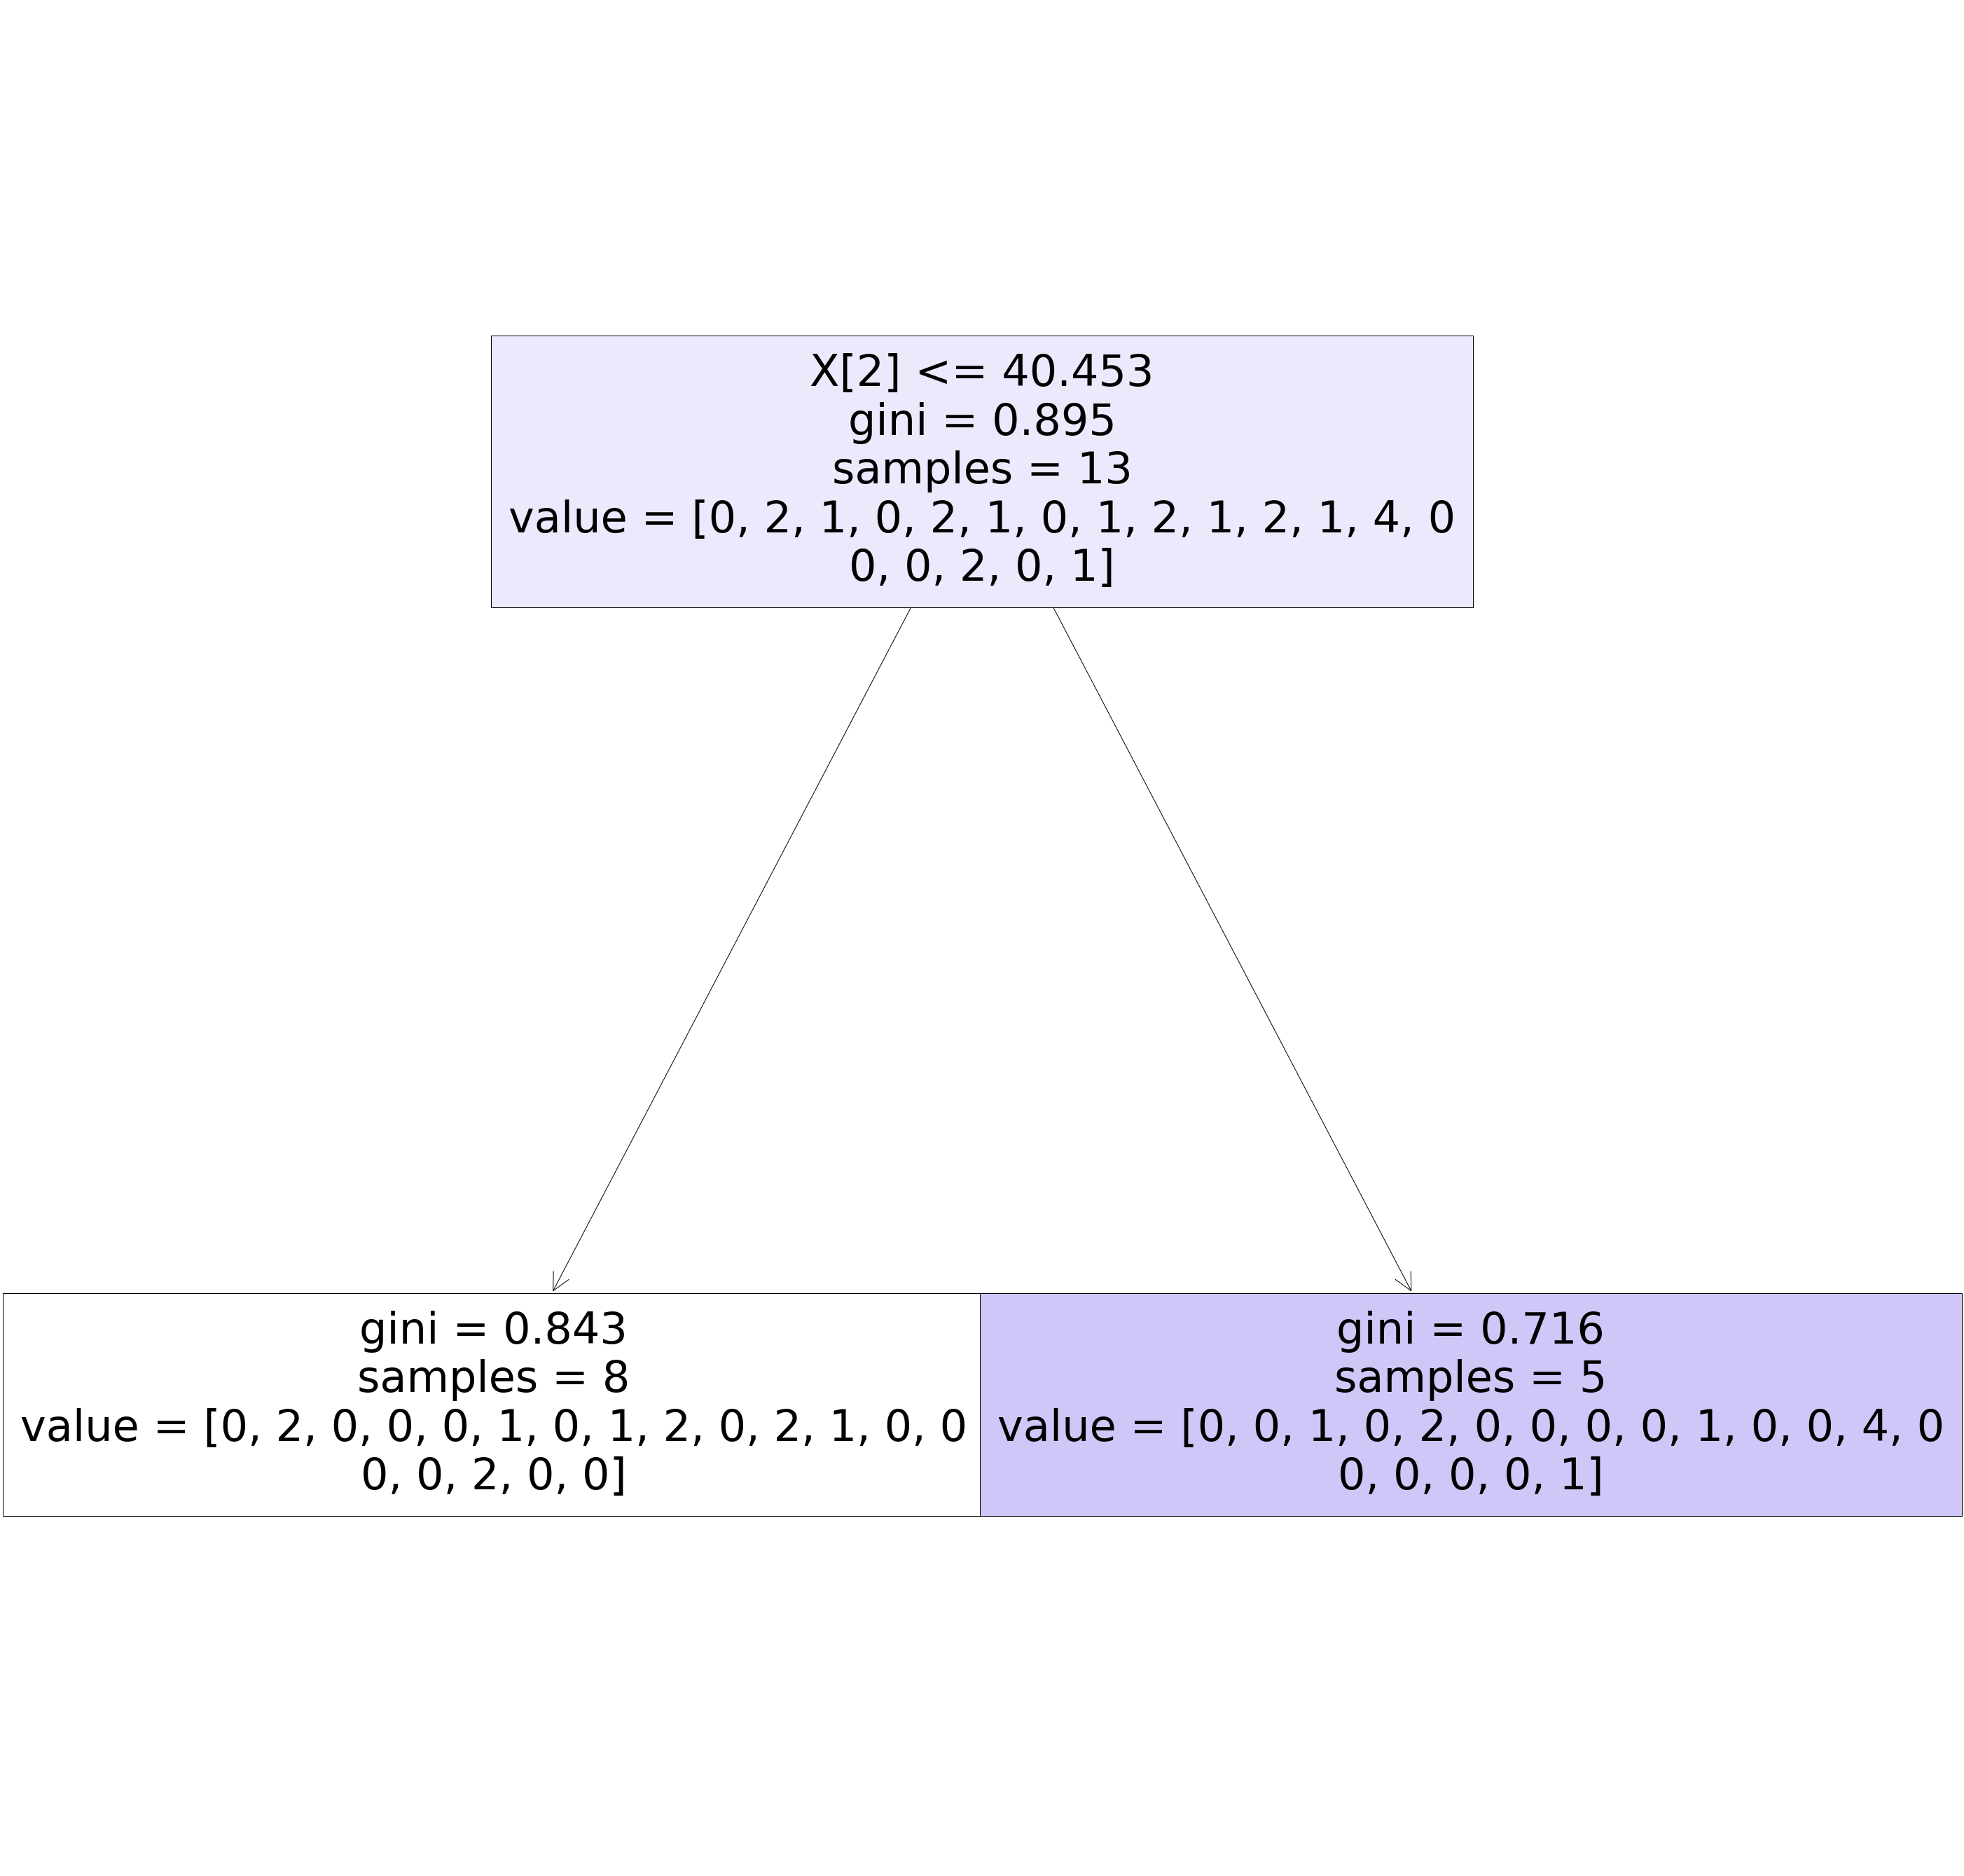

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)